In [1]:
# importing the required libraries

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# To simulate stock prices, we need some input parameters.

# setup params for brownian motion
# Definie the initial stock price, s0.
s0 = 131.00
# Define sigma which is the percentage volatility
sigma = 0.25
# Define mu (drift), which determine the overall trend.
mu = 0.35

In [3]:
# setup the simulation

# Setup the simulation with 1,000 simulation paths.
paths = 1000
# delta refers to the time step
delta = 1.0/252.0
# I want to model a new stock price every day so I use 1/252 to represent 1 day in 252 trading days
# The length of the simulation is 5 years.
time = 252 * 5

In [4]:
# build a function that returns a Wiener process. 
# This function returns a 2-dimentional array with 1,260 rows and 1,000 columns.
# Each row is a day and each column is a simulation path.

def wiener_process(delta, sigma, time, paths):
    """Returns a Wiener process
    
    Parameters
    ----------
    delta : float
        The increment to downsample sigma
    sigma : float
        Percentage volatility
    time : int
        Number of samples to create
    paths : int
        Number of price simulations to create
    
    Returns
    -------
    wiener_process : np.ndarray
    
    Notes
    -----
    This method returns a Wiener process. 
    The Wiener process is also called Brownian 
    motion. For more information about the 
    Wiener process check out the Wikipedia 
    page: http://en.wikipedia.org/wiki/Wiener_process
    """

    # return an array of samples from a normal distribution
    return sigma * np.random.normal(loc=0, scale=np.sqrt(delta), size=(time, paths))

In [5]:
# define a function that creates the GBM returns

def gbm_returns(delta, sigma, time, mu, paths):
    """Returns from a Geometric brownian motion
    
    Parameters
    ----------
    delta : float
        The increment to downsample sigma
    sigma : float
        Percentage volatility
    time : int
        Number of samples to create
    mu : float
        Percentage drift
    paths : int
        Number of price simulations to create
    
    Returns
    -------
    gbm_returns : np.ndarray
    
    Notes
    -----
    This method constructs random Geometric Brownian 
    Motion (GBM).
    """
    process = wiener_process(delta, sigma, time, paths)
    return np.exp(
        process + (mu - sigma**2 / 2) * delta
    )

In [6]:
# prepend a row of 1s to the returns array
# multiply the starting stock price by the cumulative product of the GBMreturns to produce the price paths.

def gbm_levels(s0, delta, sigma, time, mu, paths):
    """Returns price paths starting at s0
    
    Parameters
    ----------
    s0 : float
        The starting stock price
    delta : float
        The increment to downsample sigma
    sigma : float
        Percentage volatility
    time : int
        Number of samples to create
    mu : float
        Percentage drift
    paths : int
        Number of price simulations to create
    
    Returns
    -------
    gbm_levels : np.ndarray
    """
    returns = gbm_returns(delta, sigma, time, mu, paths)

    stacked = np.vstack([np.ones(paths), returns])
    return s0 * stacked.cumprod(axis=0)

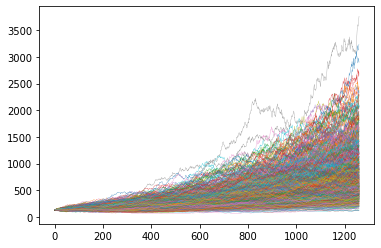

In [10]:
# Visualize the results

# The first example simulates 1,000 price paths over 5 years. 
# It starts at a price of 131 with 25% annualized volatility and 35% average return per year. 
# This is the volatility and return of Apple in 2021.

price_paths = gbm_levels(s0, delta, sigma, time, mu, paths)
plt.plot(price_paths, linewidth=0.25)

# Save the figure.
plt.savefig("./Images/gbm.jpg")
plt.show()

In [8]:
# As you might expect, a 35% drift causes most price paths to increase from from the initial price. 
# Test exactly how many have increased from the initial price.
len(price_paths[-1, price_paths[-1, :] > s0])


998

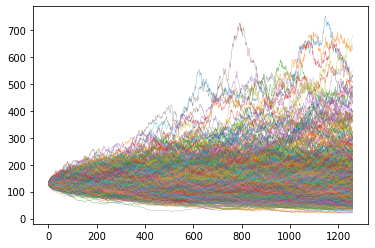

In [11]:
# set the drift to 0.0.

price_paths = gbm_levels(s0, delta, sigma, time, 0.0, paths)
plt.plot(price_paths, linewidth=0.25)
plt.savefig("./Images/gbm_0-Drift.jpg")
plt.show()